In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [8]:
path="./token_frequencies.csv"
df=pd.read_csv(path)
df_part1 = df[df['Type'] == 'Word']
df_part2 = df[df['Type'] == 'Bi-Gram']
df.head()

,Token,Type,Overall Frequency,Freq Neg,Freq Pos
0,aa,Word,240,156,84
1,aaa,Word,157,97,60
2,aaaa,Word,81,47,34
3,aaaaa,Word,39,27,12
4,aaaaaa,Word,30,17,13


In [4]:
print(df_part1.shape)
print(df_part2.shape)

(30828, 5)
(95390, 5)


## bar plot to know what most popular and excited words 

### this is the old code

C:\Users\keep_\AppData\Local\Temp\ipykernel_128208\3345294465.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_words['Token'], y=top_words['Overall Frequency'], palette='viridis')


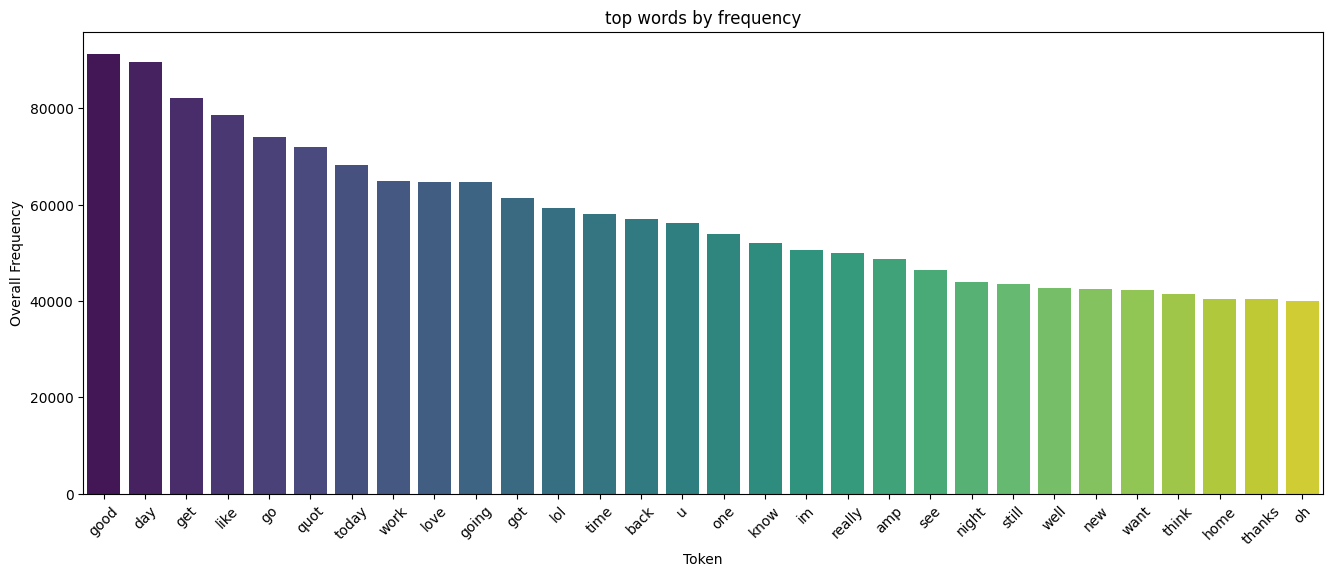

C:\Users\keep_\AppData\Local\Temp\ipykernel_128208\3345294465.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_bigrams['Token'], y=top_bigrams['Overall Frequency'], palette='viridis')


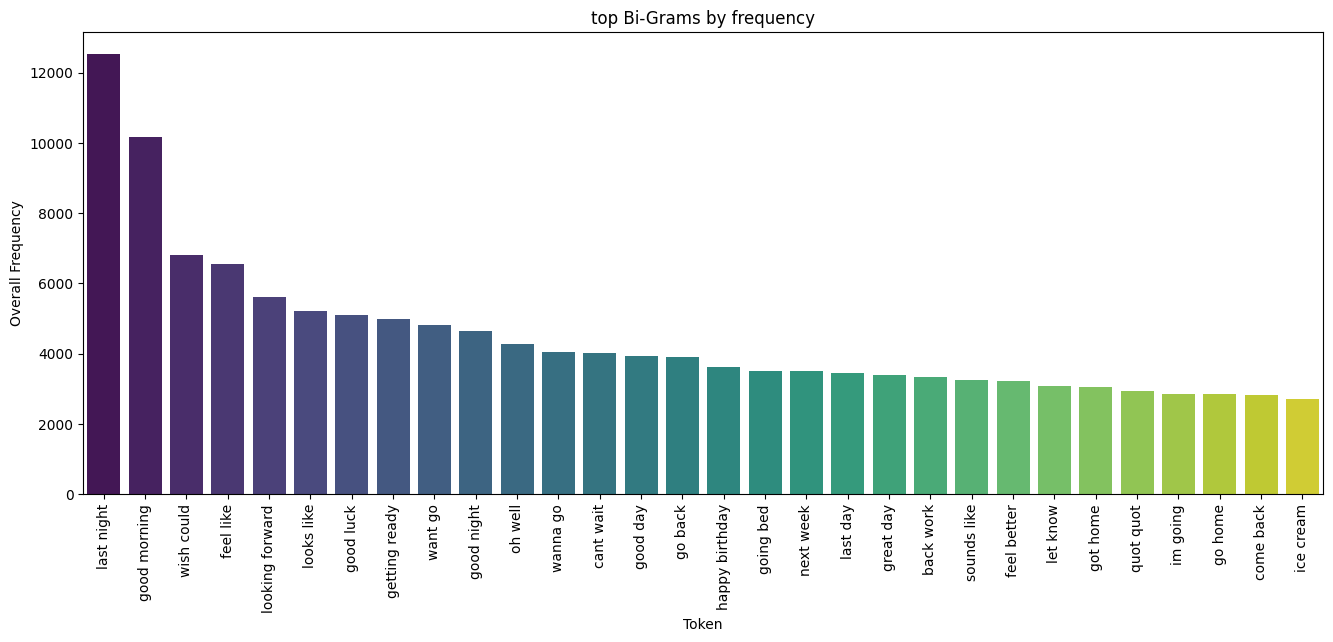

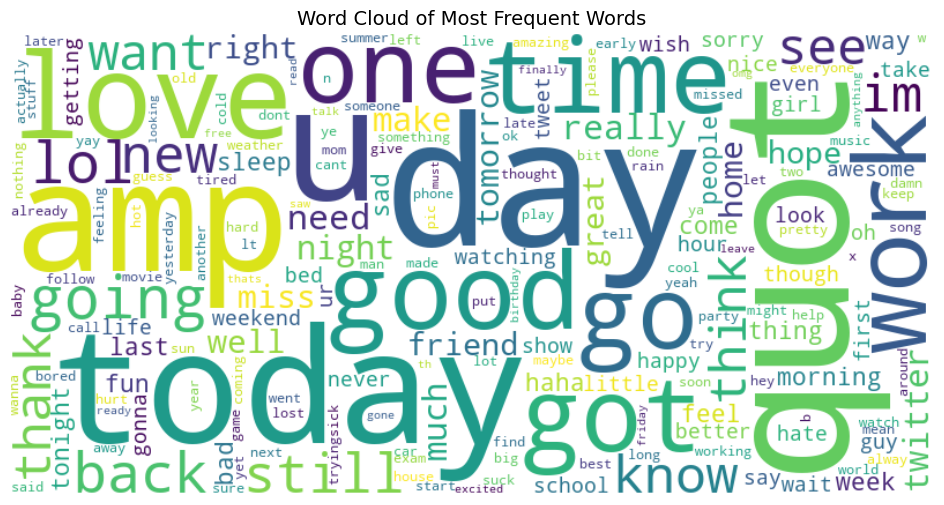

In [17]:
# bar plot to know what most popular and excited words 
plt.figure(figsize=(16,6))
top_words = df_part1.sort_values(by='Overall Frequency', ascending=False).head(30)
sns.barplot(x=top_words['Token'], y=top_words['Overall Frequency'], palette='viridis')
plt.xticks(rotation=45)
plt.title('top words by frequency')
plt.show()

plt.figure(figsize=(16,6))
top_bigrams = df_part2.sort_values(by='Overall Frequency', ascending=False).head(30)
sns.barplot(x=top_bigrams['Token'], y=top_bigrams['Overall Frequency'], palette='viridis')
plt.xticks(rotation=90)
plt.title('top Bi-Grams by frequency')
plt.show()

# same idea by world map
wordcloud = WordCloud(
    width=800, height=400, background_color='white', colormap='viridis'
).generate(' '.join(df['Token'].astype(str))) 

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title('Word Cloud of Most Frequent Words', fontsize=14)
plt.show()
wordcloud1 = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(' '.join(df_part1['Token'].astype(str)))

# #bad or good 


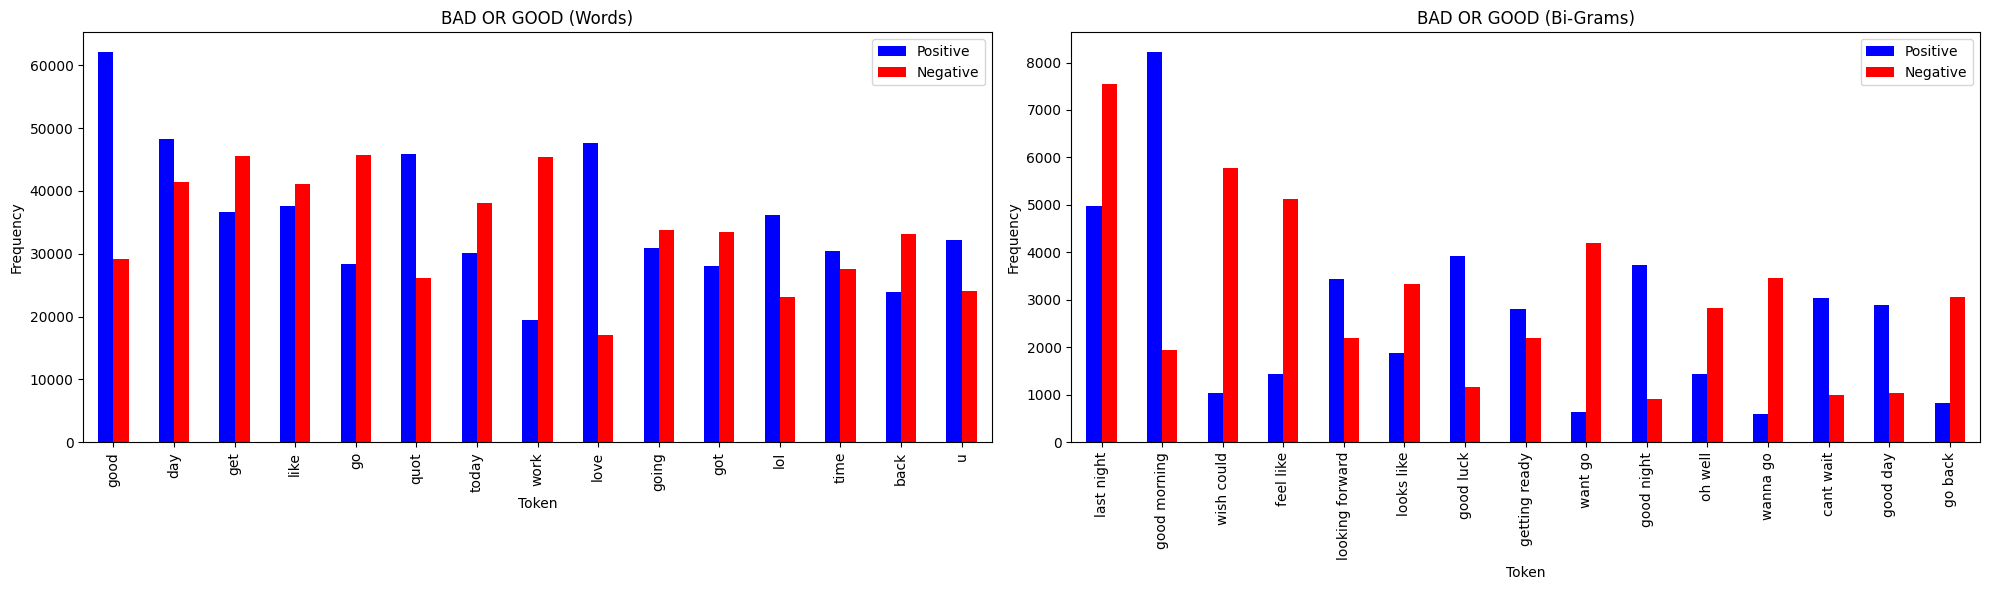

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
df_top1 = df_part1.sort_values(by='Overall Frequency', ascending=False).head(15)
df_top1[['Token', 'Freq Pos', 'Freq Neg']].set_index('Token').plot(
    kind='bar', stacked=False, ax=axes[0], color=['blue', 'red']
)
axes[0].set_title('BAD OR GOOD (Words)')
axes[0].set_xlabel('Token')
axes[0].set_ylabel('Frequency')
axes[0].legend(['Positive', 'Negative'])

df_top2 = df_part2.sort_values(by='Overall Frequency', ascending=False).head(15)
df_top2[['Token', 'Freq Pos', 'Freq Neg']].set_index('Token').plot(
    kind='bar', stacked=False, ax=axes[1], color=['blue', 'red']
)
axes[1].set_title('BAD OR GOOD (Bi-Grams)')
axes[1].set_xlabel('Token')
axes[1].set_ylabel('Frequency')
axes[1].legend(['Positive', 'Negative'])

plt.tight_layout()
plt.show()

# pie chart will affect on machine learning usage test and train -

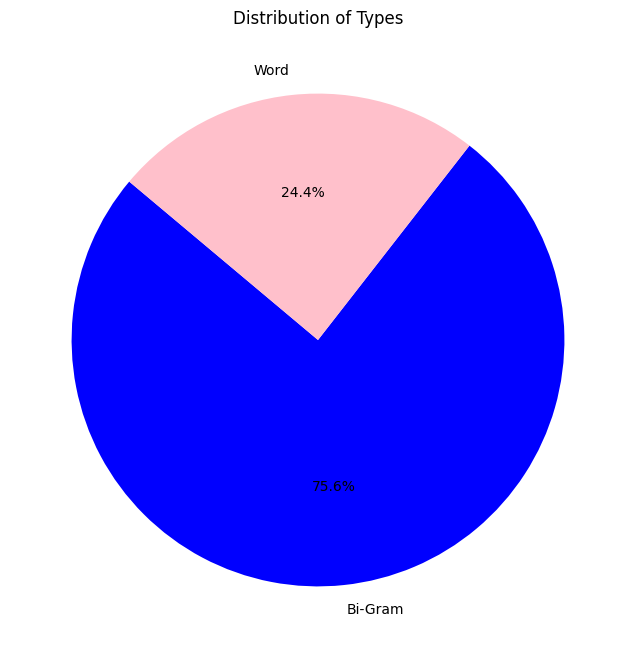

In [9]:
type_counts = df['Type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'pink'])
plt.title('Distribution of Types')
plt.show()


In [9]:
df = pd.read_csv('./entities_sentiment_distribution.csv')

In [10]:
df_users = df[df['Type'] == 'User'].sort_values(by='Overall Frequency', ascending=False)
df_mentions = df[df['Type'] == 'Mention'].sort_values(by='Overall Frequency', ascending=False)
df_hashtags = df[df['Type'] == 'Hashtag'].sort_values(by='Overall Frequency', ascending=False)
df_urls = df[df['Type'] == 'URL'].sort_values(by='Overall Frequency', ascending=False)

C:\Users\keep_\AppData\Local\Temp\ipykernel_7380\3426719424.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Token', y='Overall Frequency', data=top_users, palette='viridis', ax=ax)
C:\Users\keep_\AppData\Local\Temp\ipykernel_7380\3426719424.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
C:\Users\keep_\AppData\Local\Temp\ipykernel_7380\3426719424.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Token', y='Overall Frequency', data=top_mentions, palette='viridis', ax=ax)
C:\Users\keep_\AppData\Local\Temp\ipykernel_7380\3426719424.py:21: UserWarning: FixedFormatter should only be used toget

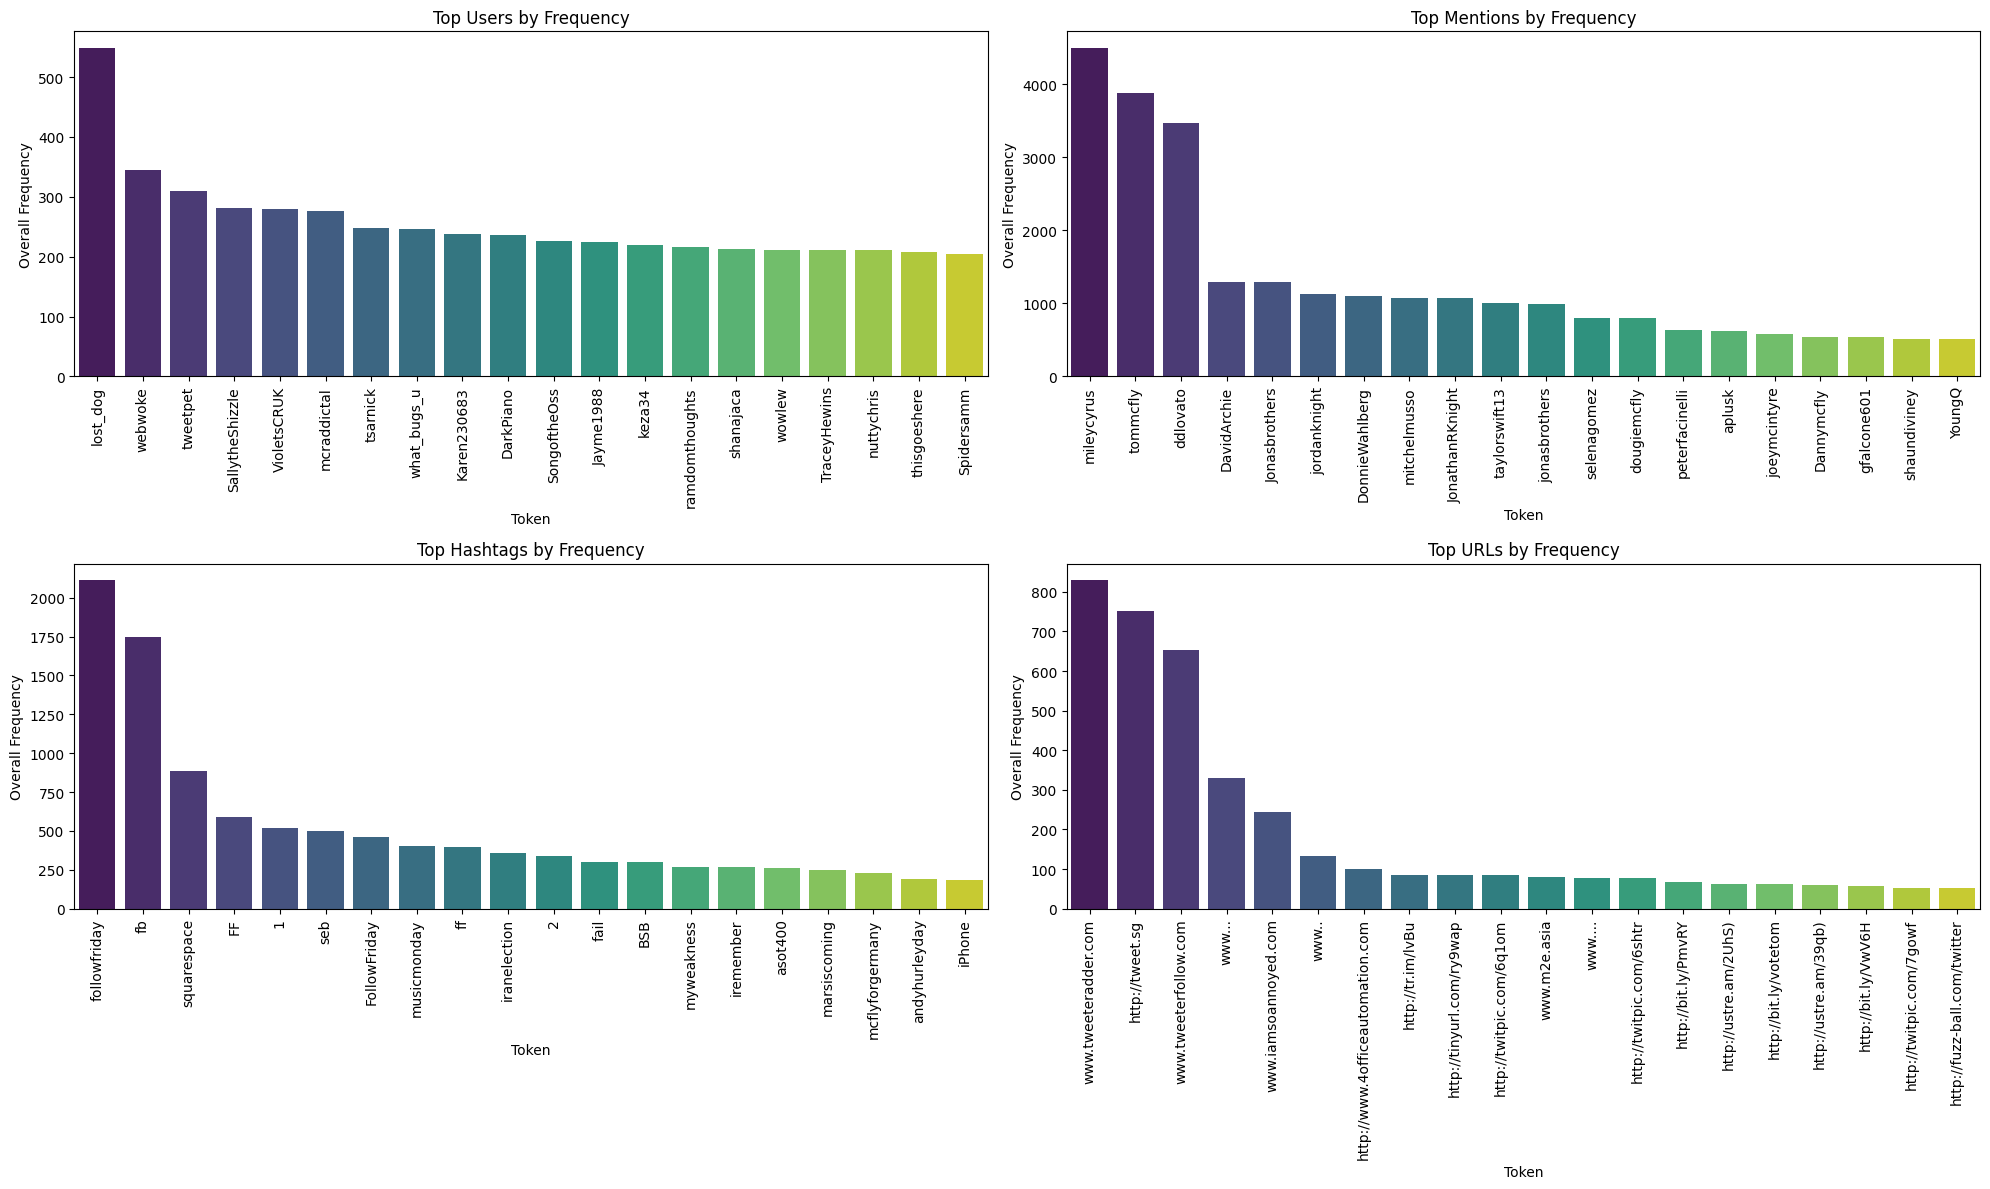

In [11]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# --- Plot 1: Top Users ---
ax = axes[0][0]
top_users = df_users.sort_values(by='Overall Frequency', ascending=False).head(20)
sns.barplot(x='Token', y='Overall Frequency', data=top_users, palette='viridis', ax=ax)
ax.set_title('Top Users by Frequency')
ax.set_xlabel('Token')
ax.set_ylabel('Overall Frequency')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.tick_params(axis='x', which='major')  # Adjust label size if necessary

# --- Plot 2: Top Mentions ---
ax = axes[0][1]
top_mentions = df_mentions.sort_values(by='Overall Frequency', ascending=False).head(20)
sns.barplot(x='Token', y='Overall Frequency', data=top_mentions, palette='viridis', ax=ax)
ax.set_title('Top Mentions by Frequency')
ax.set_xlabel('Token')
ax.set_ylabel('Overall Frequency')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.tick_params(axis='x', which='major')

# --- Plot 3: Top Hashtags ---
ax = axes[1][0]
top_hashtags = df_hashtags.sort_values(by='Overall Frequency', ascending=False).head(20)
sns.barplot(x='Token', y='Overall Frequency', data=top_hashtags, palette='viridis', ax=ax)
ax.set_title('Top Hashtags by Frequency')
ax.set_xlabel('Token')
ax.set_ylabel('Overall Frequency')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.tick_params(axis='x', which='major')

# --- Plot 4: Top URLs ---
ax = axes[1][1]
top_urls = df_urls.sort_values(by='Overall Frequency', ascending=False).head(20)
sns.barplot(x='Token', y='Overall Frequency', data=top_urls, palette='viridis', ax=ax)
ax.set_title('Top URLs by Frequency')
ax.set_xlabel('Token')
ax.set_ylabel('Overall Frequency')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.tick_params(axis='x', which='major')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

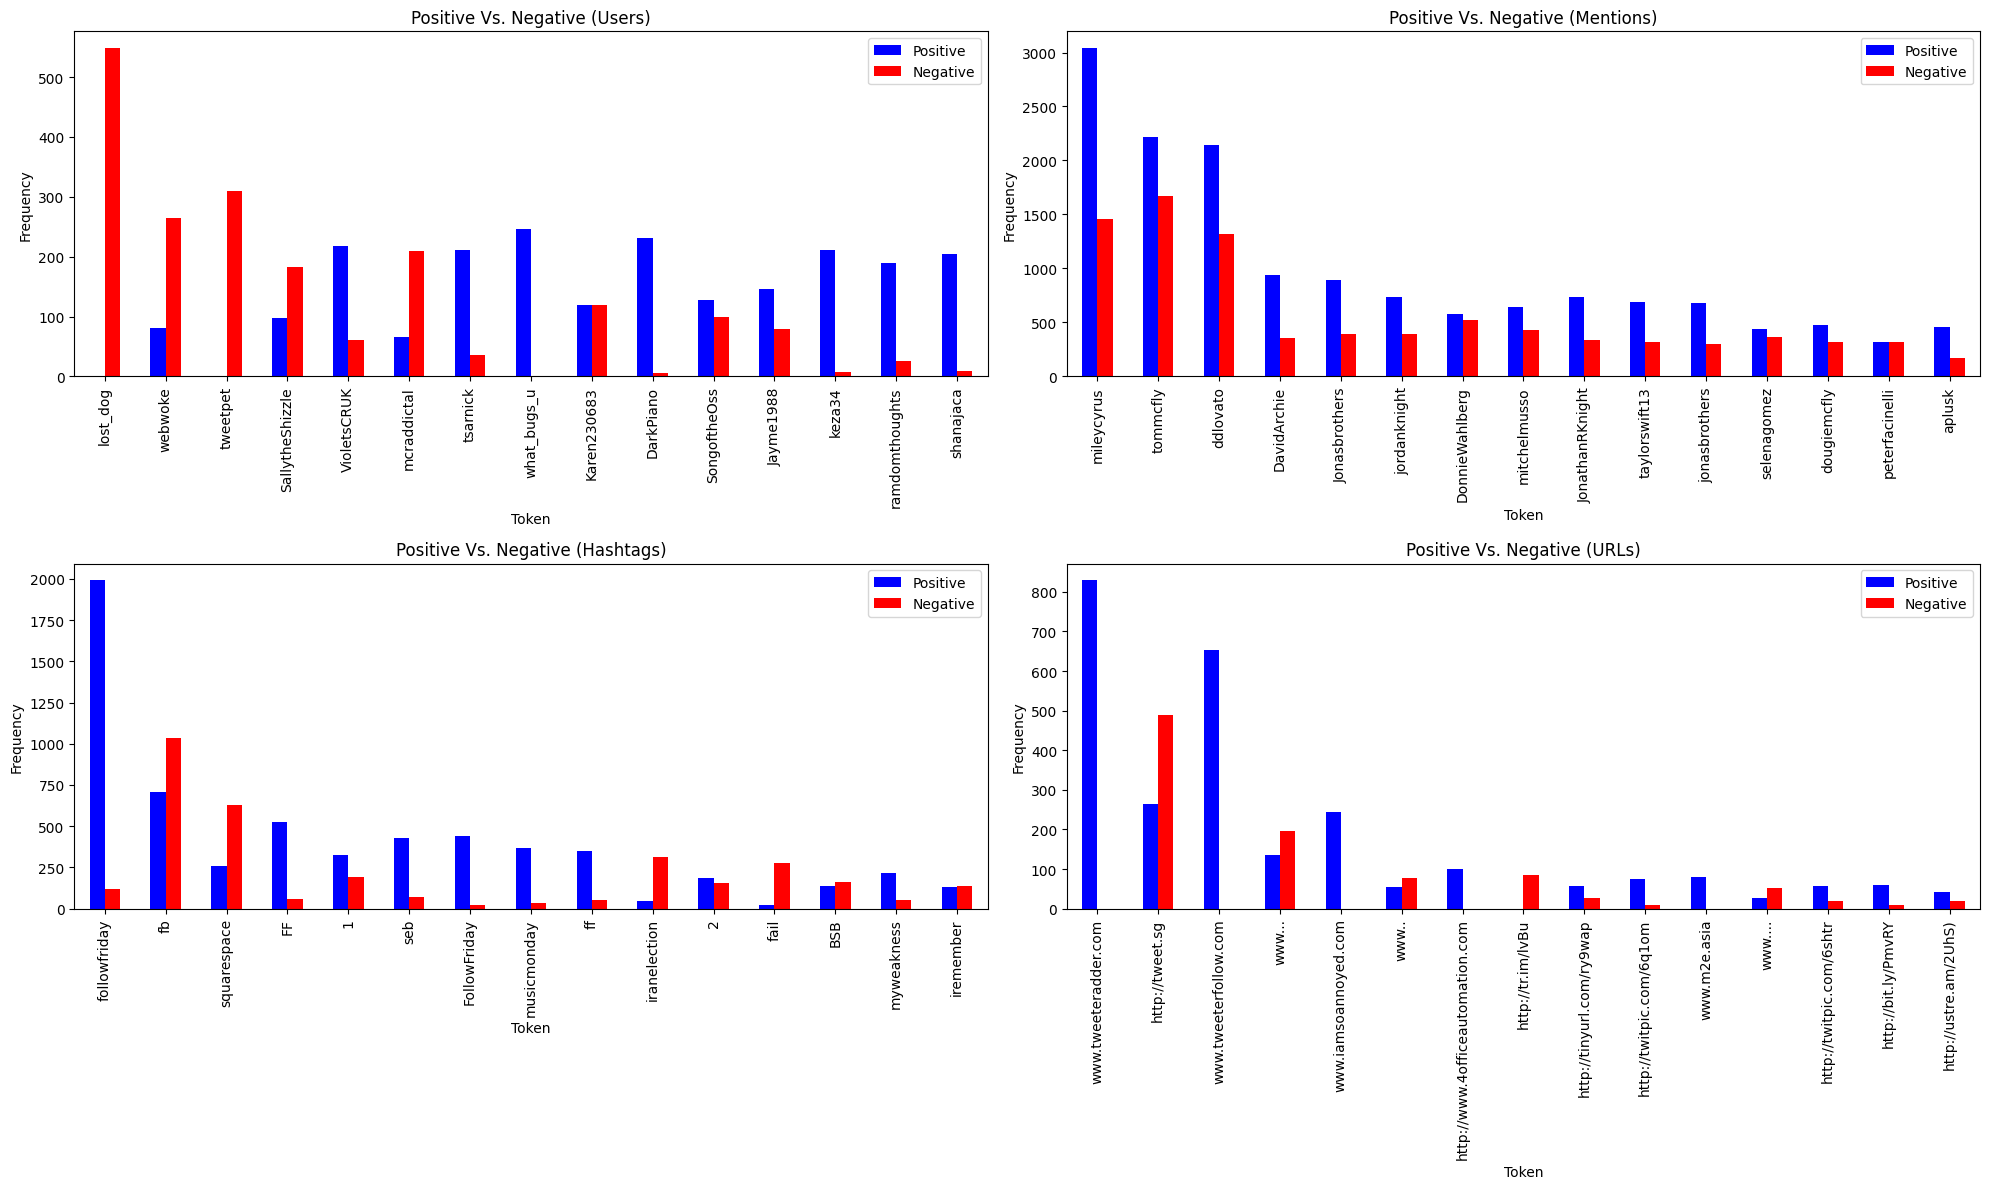

In [12]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# --- Plot 1: Top Users ---
ax = axes[0][0]
df_top_users = df_users.sort_values(by='Overall Frequency', ascending=False).head(15)
df_top_users[['Token', 'Freq Pos', 'Freq Neg']].set_index('Token').plot(
    kind='bar', stacked=False, ax=ax, color=['blue', 'red']
)
ax.set_title('Positive Vs. Negative (Users)')
ax.set_xlabel('Token')
ax.set_ylabel('Frequency')
ax.legend(['Positive', 'Negative'])

# --- Plot 2: Top Mentions ---
ax = axes[0][1]
df_top_mentions = df_mentions.sort_values(by='Overall Frequency', ascending=False).head(15)
df_top_mentions[['Token', 'Freq Pos', 'Freq Neg']].set_index('Token').plot(
    kind='bar', stacked=False, ax=ax, color=['blue', 'red']
)
ax.set_title('Positive Vs. Negative (Mentions)')
ax.set_xlabel('Token')
ax.set_ylabel('Frequency')
ax.legend(['Positive', 'Negative'])

# --- Plot 3: Top Hashtags ---
ax = axes[1][0]
df_top_hashtags = df_hashtags.sort_values(by='Overall Frequency', ascending=False).head(15)
df_top_hashtags[['Token', 'Freq Pos', 'Freq Neg']].set_index('Token').plot(
    kind='bar', stacked=False, ax=ax, color=['blue', 'red']
)
ax.set_title('Positive Vs. Negative (Hashtags)')
ax.set_xlabel('Token')
ax.set_ylabel('Frequency')
ax.legend(['Positive', 'Negative'])

# --- Plot 4: Top URLs ---
ax = axes[1][1]
df_top_urls = df_urls.sort_values(by='Overall Frequency', ascending=False).head(15)
df_top_urls[['Token', 'Freq Pos', 'Freq Neg']].set_index('Token').plot(
    kind='bar', stacked=False, ax=ax, color=['blue', 'red']
)
ax.set_title('Positive Vs. Negative (URLs)')
ax.set_xlabel('Token')
ax.set_ylabel('Frequency')
ax.legend(['Positive', 'Negative'])

plt.tight_layout()
plt.show()